In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# convert .jpg

In [2]:
from AquaML.common.ImageTool import save_from_array

imgs = np.load('H.npy')
save_from_array(imgs, 'Dataset/land2')

# Gray label

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x7F27AB0C85E0>


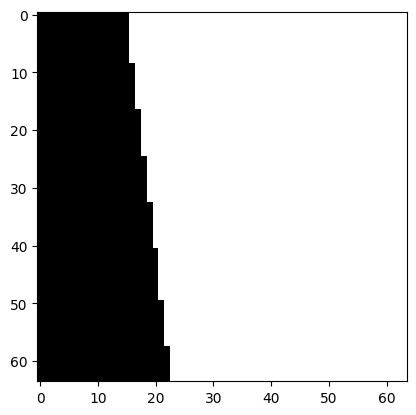

In [135]:
random_index = np.random.uniform(0, 100000, 1)
random_index = int(random_index)
random_index = 3106
img_label1 = Image.open('Dataset/label/{}.jpg'.format(str(random_index)))
print(img_label1)
img_label1_gray = np.array(img_label1)[:, :, 2]/255
img_label1_gray = np.where(img_label1_gray < 0.5, 0, 1)
plt.imshow(img_label1_gray, cmap='gray')

# process land zone

## pencil filter

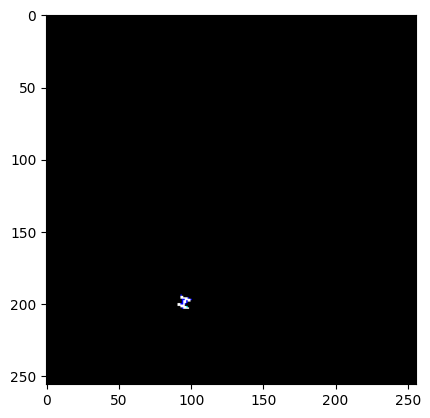

In [182]:
from AquaML.tool.CVFilter import PencilFilter

fil = PencilFilter(dilatation_size=2)
random_index = np.random.uniform(0, 30000, 1)
random_index = int(random_index)
img_land1 = Image.open('Dataset/land2/{}.jpg'.format(random_index))
img_land1 = np.array(img_land1)
img_land1 = np.where(img_land1 > 200, 0, 255)
# res = fil.apply(img_land1)
plt.imshow(img_land1)

## Add texture

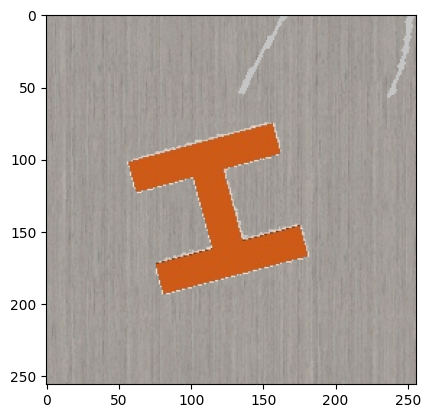

In [275]:
random_texture_index = np.random.uniform(0, 100, 1)
random_index = np.random.uniform(0, 30000, 1)
random_texture_index = int(random_texture_index)
random_index = int(random_index)
img_texture = Image.open('Dataset/texture/{}.png'.format(random_texture_index))
img_land = Image.open('Dataset/land2/{}.jpg'.format(random_index))
img_texture = np.array(img_texture)
img_land = np.array(img_land)
# plt.imshow(img_texture)
# img_mix_land = np.where(img_land[:, :, 0] > 200, img_texture, img_land)
img_mix_index = np.where(img_land[:, :, 2] > 200)
img_land[img_mix_index[0], img_mix_index[1],  :] = img_texture[img_mix_index[0],  img_mix_index[1],  :]
# print(img_mix_index)
plt.imshow(img_land)